In [1]:
####
## Celso Antonio Uliana Junior
## July 2 2020
####

import pandas as pd

#####
## Consuming and shaping the data to analysis
## Covid-19 numbers in Brazil by date
## Isolation percentage in Brazil by date
#####

data_raw_covid = pd.read_csv("C:/Users/PCDOMILHAO/Documents/GitHub/trab-siad/scripts/Jupyter-Notebook/dados/covidBrasil.csv", sep = ";", decimal = ",")
data_covid = data_raw_covid['Data'].values.copy()
data_covid = data_raw_covid.dropna().set_index("Data")

####
## Shaping a central pandas dataFrame for all our ML needs
####

data = data_covid

In [2]:
from sklearn.preprocessing import MinMaxScaler

####
## normalizing values for both covid and isolation percentage 
## between range [0,1] using sklearn MinMaxScaler
####

covid_norm = data_covid["Casos"].values.copy()
covid_norm.shape = (len(covid_norm), 1)

####
## Shaping the central dataFrame with normalized values
####
min_max_scaler = MinMaxScaler()

covid_norm = min_max_scaler.fit_transform(covid_norm)

data["CasosNormalizados"] = covid_norm
data.head(200)

,Casos,CasosNormalizados
Data,,
26/2/20,1,0.000018
27/2/20,0,0.000000
28/2/20,0,0.000000
29/2/20,0,0.000000
1/3/20,1,0.000018
...,...,...
17/6/20,34918,0.637527
18/6/20,32188,0.587683
19/6/20,22765,0.415640


In [3]:
####
## Sliding window
## This example of sliding window looks at past data
####
df = pd.DataFrame()
window_size = 7
for i in range(0, window_size + 1):
    df['E{}'.format(i)] = data['CasosNormalizados'].shift(+i)
df = df.iloc[+window_size:]
print(df)

               E0        E1        E2        E3        E4        E5        E6  \
Data                                                                            
4/3/20   0.000000  0.000000  0.000000  0.000018  0.000000  0.000000  0.000000   
5/3/20   0.000018  0.000000  0.000000  0.000000  0.000018  0.000000  0.000000   
6/3/20   0.000091  0.000018  0.000000  0.000000  0.000000  0.000018  0.000000   
7/3/20   0.000091  0.000091  0.000018  0.000000  0.000000  0.000000  0.000018   
8/3/20   0.000000  0.000091  0.000091  0.000018  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
17/6/20  0.637527  0.376970  0.312392  0.396268  0.474375  0.555257  0.600920   
18/6/20  0.587683  0.637527  0.376970  0.312392  0.396268  0.474375  0.555257   
19/6/20  0.415640  0.587683  0.637527  0.376970  0.312392  0.396268  0.474375   
20/6/20  1.000000  0.415640  0.587683  0.637527  0.376970  0.312392  0.396268   
21/6/20  0.632926  1.000000 

In [4]:
####
## Manipulating the data to split into X(a window size of values)
## and target, or Y, the value X "produces"
####

arr = df.values

X = arr[:, 1:]
target = arr[:, 0]
#target = arr[:, -1]
#print(X)
#print(arr)
#print(target)

In [5]:
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

mlp = MLPRegressor(
    hidden_layer_sizes = (50,),  activation = 'relu', solver = 'adam', alpha = 0.001, batch_size = 'auto',
    learning_rate = 'constant', learning_rate_init = 0.01, power_t = 0.5, max_iter = 1000, shuffle = True,
    random_state = 9, tol = 0.0001, verbose = True, warm_start = False, momentum = 0.9, nesterovs_momentum = True,
    early_stopping = False, validation_fraction = 0.1, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08)
svr = SVR(kernel = 'linear', C = 0.25, epsilon = 0.01, verbose = True, max_iter = 1000)
lr = LinearRegression()

full_predict_lr = cross_val_predict(lr, X, target, cv = 10)
full_predict_mlp = cross_val_predict(mlp, X, target, cv = 10)
full_predict_svr = cross_val_predict(svr, X, target, cv = 10)

Iteration 1, loss = 0.02299486
Iteration 2, loss = 0.01485870
Iteration 3, loss = 0.00990159
Iteration 4, loss = 0.00529995
Iteration 5, loss = 0.00342768
Iteration 6, loss = 0.00449443
Iteration 7, loss = 0.00573461
Iteration 8, loss = 0.00603868
Iteration 9, loss = 0.00625136
Iteration 10, loss = 0.00637758
Iteration 11, loss = 0.00588828
Iteration 12, loss = 0.00486324
Iteration 13, loss = 0.00387186
Iteration 14, loss = 0.00333691
Iteration 15, loss = 0.00321202
Iteration 16, loss = 0.00319692
Iteration 17, loss = 0.00319216
Iteration 18, loss = 0.00329905
Iteration 19, loss = 0.00354189
Iteration 20, loss = 0.00376468
Iteration 21, loss = 0.00379597
Iteration 22, loss = 0.00363827
Iteration 23, loss = 0.00343096
Iteration 24, loss = 0.00326434
Iteration 25, loss = 0.00311680
Iteration 26, loss = 0.00294412
Iteration 27, loss = 0.00277921
Iteration 28, loss = 0.00270788
Iteration 29, loss = 0.00274182
Iteration 30, loss = 0.00281365
Iteration 31, loss = 0.00285573
Iteration 32, los

Iteration 35, loss = 0.00261844
Iteration 36, loss = 0.00254778
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02246374
Iteration 2, loss = 0.01052430
Iteration 3, loss = 0.00462768
Iteration 4, loss = 0.00326934
Iteration 5, loss = 0.00489517
Iteration 6, loss = 0.00670255
Iteration 7, loss = 0.00713253
Iteration 8, loss = 0.00631864
Iteration 9, loss = 0.00494117
Iteration 10, loss = 0.00370133
Iteration 11, loss = 0.00297513
Iteration 12, loss = 0.00281423
Iteration 13, loss = 0.00305463
Iteration 14, loss = 0.00347196
Iteration 15, loss = 0.00382876
Iteration 16, loss = 0.00397799
Iteration 17, loss = 0.00390278
Iteration 18, loss = 0.00365607
Iteration 19, loss = 0.00332288
Iteration 20, loss = 0.00300248
Iteration 21, loss = 0.00276864
Iteration 22, loss = 0.00265826
Iteration 23, loss = 0.00266212
Iteration 24, loss = 0.00274662
Iteration 25, loss = 0.00285780
Iteration 26, loss = 0.00293659
Iteration 27, loss = 0.

In [6]:
print('Mean Squared Error in MLP: %s' %(metrics.mean_squared_error(target, full_predict_mlp)))
print('Mean Squared Error in SVR: %s' %(metrics.mean_squared_error(target, full_predict_svr)))
print('Mean Squared Error in LR: %s' %(metrics.mean_squared_error(target, full_predict_lr)))

print(len(full_predict_mlp))
print(len(full_predict_svr))
print(len(full_predict_lr))

print(len(data['CasosNormalizados']))

Mean Squared Error in MLP: 0.005627282287031134
Mean Squared Error in SVR: 0.005503692025207881
Mean Squared Error in LR: 0.00599490799826504
110
110
110
117


In [7]:
import numpy as np

values_to_add = list()
for i in range(0, window_size):
    values_to_add.append(float('NaN'))
    
full_predict_svr = np.insert(full_predict_svr, 0, values_to_add)
full_predict_svr.shape = (len(full_predict_svr), 1)
    
full_predict_mlp = np.insert(full_predict_mlp, 0, values_to_add)
full_predict_mlp.shape = (len(full_predict_mlp), 1)

full_predict_lr = np.insert(full_predict_lr, 0, values_to_add)
full_predict_lr.shape = (len(full_predict_lr), 1)

print(full_predict_svr.shape)
print(full_predict_mlp.shape)
print(full_predict_lr.shape)

(117, 1)
(117, 1)
(117, 1)


In [8]:
data['Predict_lr'] = full_predict_lr
data['Predict_mlp'] = full_predict_mlp
data['Predict_svr'] = full_predict_svr
data

,Casos,CasosNormalizados,Predict_lr,Predict_mlp,Predict_svr
Data,,,,,
26/2/20,1,0.000018,NaN,NaN,NaN
27/2/20,0,0.000000,NaN,NaN,NaN
28/2/20,0,0.000000,NaN,NaN,NaN
29/2/20,0,0.000000,NaN,NaN,NaN
1/3/20,1,0.000018,NaN,NaN,NaN
...,...,...,...,...,...
17/6/20,34918,0.637527,0.649064,0.571081,0.578973
18/6/20,32188,0.587683,0.721236,0.623626,0.630908
19/6/20,22765,0.415640,0.610291,0.575839,0.574648


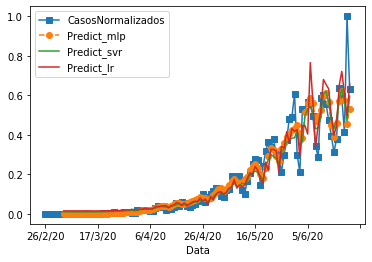

In [9]:
import matplotlib.pyplot as plt
data.plot(y=['CasosNormalizados', 'Predict_mlp', 'Predict_svr', 'Predict_lr'], style=['-s', '--o'])
plt.show()